In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.initializers import TruncatedNormal
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import ROOT
from ROOT import TH1F, TCanvas, TTree, TFile, gStyle, gMinuit, TGraph, TVectorF, gSystem, gApplication
from array import array
from sortedcontainers import SortedList
from collections import OrderedDict
from math import sqrt
from ROOT import kBlue,kRed,TMultiGraph

Using TensorFlow backend.


Welcome to JupyROOT 6.11/03


In [2]:
gApplication.ProcessFile("tdrstyle.C")

0L

In [3]:
from ROOT import setTDRStyle

In [4]:
setTDRStyle()

## Info
50=>high 50<low

In [5]:
files=SortedList([
"pi-300GeV.txt",
"pi-200GeV.txt",
"pi-150GeV.txt",
"pi-100GeV.txt",
"pi-50GeV.txt"])
#"pi-30GeV.txt",
#"pi-20GeV.txt"]
#"pi-9GeV.txt",
#"pi-8GeV.txt",
#"pi-7GeV.txt",
#"pi-6GeV.txt",
#"pi-5GeV.txt",
#"pi-4GeV.txt",
#"pi-3GeV.txt",
#"pi-2GeV.txt"]


In [6]:
lines9x9=OrderedDict()
lines3x4=OrderedDict()

#### Getting lines of length 9 and 4
the result is a map with the file

In [7]:
for i in files:
    prefix="pi-txt/"
    lines9x9buffer=[]
    lines3x4buffer=[]
    file = open(prefix+i)
    data=file.readlines()
    for l in data:
        line=np.fromstring(l.strip(),sep=" ")
        if len(line) == 9 :
            lines9x9buffer.append(line)
        if len(line) == 4 :
            lines3x4buffer.append(line)
    lines9x9[i]=lines9x9buffer
    lines3x4[i]=lines3x4buffer

In [8]:
def shapeimages9x9(lines):
    img9x9=OrderedDict()
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%9==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img9x9[key]=imgs 
    return img9x9

def shapeimages3x4(lines):
    img3x4=OrderedDict()
    for key in lines.keys():
        counter=1
        imgs=[]
        img=[]
        for line in lines[key]:
            if counter%3==0:
                img.extend(line)
                imgs.append(img)
                img=[]
            else:
                img.extend(line)
            counter=counter+1
        img3x4[key]=imgs 
    return img3x4


In [9]:
img9x9 = shapeimages9x9(lines9x9)
img3x4 = shapeimages3x4(lines3x4)

#### Plotting img

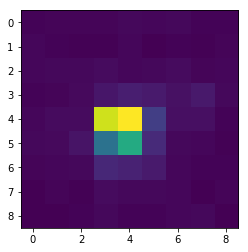

In [10]:
plt.imshow(np.array(img9x9['pi-100GeV.txt'][0]).reshape((9,9)))
plt.show()

In [11]:
#image A must be 3x4 flattened
def ImgMask3x3To9x9(A):
    B=np.zeros(81)
    #row 1
    B[0]=A[0]/6.0
    B[1]=A[0]/6.0
    B[2]=A[1]/9.0
    B[3]=A[1]/9.0
    B[4]=A[1]/9.0
    B[5]=A[2]/9.0
    B[6]=A[2]/9.0
    B[7]=A[2]/9.0
    B[8]=A[3]/3.0
    
    #row 2
    B[9] =A[0]/6.0
    B[10]=A[0]/6.0
    B[11]=A[1]/9.0
    B[12]=A[1]/9.0
    B[13]=A[1]/9.0
    B[14]=A[2]/9.0
    B[15]=A[2]/9.0
    B[16]=A[2]/9.0
    B[17]=A[3]/3.0

    #row 3
    B[18]=A[0]/6.0
    B[19]=A[0]/6.0
    B[20]=A[1]/9.0
    B[21]=A[1]/9.0
    B[22]=A[1]/9.0
    B[23]=A[2]/9.0
    B[24]=A[2]/9.0
    B[25]=A[2]/9.0
    B[26]=A[3]/3.0

    #row 4
    B[27]=A[4]/6.0
    B[28]=A[4]/6.0
    B[29]=A[5]/9.0
    B[30]=A[5]/9.0
    B[31]=A[5]/9.0
    B[32]=A[6]/9.0
    B[33]=A[6]/9.0
    B[34]=A[6]/9.0
    B[35]=A[7]/3.0

    #row 5
    B[36]=A[4]/6.0
    B[37]=A[4]/6.0
    B[38]=A[5]/9.0
    B[39]=A[5]/9.0
    B[40]=A[5]/9.0
    B[41]=A[6]/9.0
    B[42]=A[6]/9.0
    B[43]=A[6]/9.0
    B[44]=A[7]/3.0
    
    #row 6
    B[45]=A[4]/6.0
    B[46]=A[4]/6.0
    B[47]=A[5]/9.0
    B[48]=A[5]/9.0
    B[49]=A[5]/9.0
    B[50]=A[6]/9.0
    B[51]=A[6]/9.0
    B[52]=A[6]/9.0
    B[53]=A[7]/3.0

    #row 7
    B[54]=A[8]/6.0
    B[55]=A[8]/6.0
    B[56]=A[9]/9.0
    B[57]=A[9]/9.0
    B[58]=A[9]/9.0
    B[59]=A[10]/9.0
    B[60]=A[10]/9.0
    B[61]=A[10]/9.0
    B[62]=A[11]/3.0
    
    #row 8
    B[63]=A[8]/6.0
    B[64]=A[8]/6.0
    B[65]=A[9]/9.0
    B[66]=A[9]/9.0
    B[67]=A[9]/9.0
    B[68]=A[10]/9.0
    B[69]=A[10]/9.0
    B[70]=A[10]/9.0
    B[71]=A[11]/3.0

    #row 9
    B[72]=A[8]/6.0
    B[73]=A[8]/6.0
    B[74]=A[9]/9.0
    B[75]=A[9]/9.0
    B[76]=A[9]/9.0
    B[77]=A[10]/9.0
    B[78]=A[10]/9.0
    B[79]=A[10]/9.0
    B[80]=A[11]/3.0
    return B


In [12]:
img9x9_2=OrderedDict()
for img in img3x4:
    print("processing 3x4 to 9x9 %s"%(img))
    imgs=[]
    for i in img3x4[img]:
        imgs.append(ImgMask3x3To9x9(i))
    img9x9_2[img]=imgs

processing 3x4 to 9x9 pi-100GeV.txt
processing 3x4 to 9x9 pi-150GeV.txt
processing 3x4 to 9x9 pi-200GeV.txt
processing 3x4 to 9x9 pi-300GeV.txt
processing 3x4 to 9x9 pi-50GeV.txt


# Printing shapes and events
shapes for all 9x9 images and 4x3 extended to 9x9
and the number of events

In [13]:
img9x9.keys()


['pi-100GeV.txt',
 'pi-150GeV.txt',
 'pi-200GeV.txt',
 'pi-300GeV.txt',
 'pi-50GeV.txt']

In [14]:
print("original 9x9 images and file")
for i in img9x9:
    print("file %s \nshape "%(i))
    print(np.array(img9x9[i]).shape)
    
print("new images 9x9 from 3x4 and file")
for i in img9x9_2:
    print("file %s \nshape "%(i))
    print(np.array(img9x9_2[i]).shape)    

original 9x9 images and file
file pi-100GeV.txt 
shape 
(14554, 81)
file pi-150GeV.txt 
shape 
(10668, 81)
file pi-200GeV.txt 
shape 
(9019, 81)
file pi-300GeV.txt 
shape 
(28126, 81)
file pi-50GeV.txt 
shape 
(12603, 81)
new images 9x9 from 3x4 and file
file pi-100GeV.txt 
shape 
(14554, 81)
file pi-150GeV.txt 
shape 
(10668, 81)
file pi-200GeV.txt 
shape 
(9019, 81)
file pi-300GeV.txt 
shape 
(28126, 81)
file pi-50GeV.txt 
shape 
(12603, 81)


# Saving Train/Test for original 9x9 images

In [15]:
X_train = []
X_train_2ch = [] #two channels data
X_test = []
X_test_2ch = [] #two channels data
X_target = []
for i in img9x9:
    #ntest = np.array(img9x9[i]).shape[0] - 6000 
    ntest=1374
    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))
    print(np.array(img9x9[i]).shape)
    imgs1=np.array(img9x9[i])
    imgs2=np.array(img9x9_2[i])
    print(imgs1.shape)
    print(imgs2.shape)
    imgs=[]
    imgs2ch=[]
    for index in range(imgs1.shape[0]):
        img2ch=np.dstack((imgs1[index],imgs2[index])).reshape((9,9,2))
        imgs2ch.append(img2ch)
        img = np.concatenate((imgs1[index],imgs2[index]))
        imgs.append(img)

    nimg=np.array(imgs)
    nimg2ch=np.array(imgs2ch)
    
    print(nimg.shape)
    X_train.extend(nimg[0:8000,:])
    X_train_2ch.extend(nimg2ch[0:8000,:,:,:])
    X_test.extend(nimg[8000:9019,:])
    X_test_2ch.extend(nimg2ch[8000:9019,:,:,:])
    if "pi-50GeV.txt" == i:
        X_target.extend(np.full(8000,50))      
    if "pi-100GeV.txt" == i:
        X_target.extend(np.full(8000,100))
    if "pi-150GeV.txt" == i:
        X_target.extend(np.full(8000,150))
    if "pi-200GeV.txt" == i:
        X_target.extend(np.full(8000,200))       
    if "pi-300GeV.txt" == i:
        X_target.extend(np.full(8000,300))
#    if "pi-30GeV.txt" == i:
#        X_target.extend(np.full(8000,30))       
#    if "pi-20GeV.txt" == i:
#        X_target.extend(np.full(8000,20))       
        

proccesing pi-100GeV.txt taking 6000 event to train and 1374 to test
(14554, 81)
(14554, 81)
(14554, 81)
(14554, 162)
proccesing pi-150GeV.txt taking 6000 event to train and 1374 to test
(10668, 81)
(10668, 81)
(10668, 81)
(10668, 162)
proccesing pi-200GeV.txt taking 6000 event to train and 1374 to test
(9019, 81)
(9019, 81)
(9019, 81)
(9019, 162)
proccesing pi-300GeV.txt taking 6000 event to train and 1374 to test
(28126, 81)
(28126, 81)
(28126, 81)
(28126, 162)
proccesing pi-50GeV.txt taking 6000 event to train and 1374 to test
(12603, 81)
(12603, 81)
(12603, 81)
(12603, 162)


In [16]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(X_target).shape)
print(np.array(X_train_2ch).shape)
print(np.array(X_test_2ch).shape)

(40000, 162)
(5095, 162)
(40000,)
(40000, 9, 9, 2)
(5095, 9, 9, 2)


### Saving Train/Test for extended 9x9 images from 4x3

In [17]:
'''for i in img9x9_2:
    #ntest = np.array(img9x9_2[i]).shape[0] - 6000 
    ntest=1374    
    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))
    print(np.array(img9x9_2[i]).shape)
    imgs = np.array(img9x9_2[i])
    X_train.extend(imgs[0:6000,:])
    X_test.extend(imgs[6000:7374,:])
    if "pi-300GeV.txt" == i:
        X_target.extend(np.full(6000,300))
    if "pi-200GeV.txt" == i:
        X_target.extend(np.full(6000,200))       
    if "pi-150GeV.txt" == i:
        X_target.extend(np.full(6000,150))
    if "pi-100GeV.txt" == i:
        X_target.extend(np.full(6000,100))
    if "pi-50GeV.txt" == i:
        X_target.extend(np.full(6000,50))      
    if "pi-30GeV.txt" == i:
        X_target.extend(np.full(6000,30))       
    if "pi-20GeV.txt" == i:
        X_target.extend(np.full(6000,20))       
'''        

'for i in img9x9_2:\n    #ntest = np.array(img9x9_2[i]).shape[0] - 6000 \n    ntest=1374    \n    print("proccesing %s taking 6000 event to train and %d to test"%(i,ntest))\n    print(np.array(img9x9_2[i]).shape)\n    imgs = np.array(img9x9_2[i])\n    X_train.extend(imgs[0:6000,:])\n    X_test.extend(imgs[6000:7374,:])\n    if "pi-300GeV.txt" == i:\n        X_target.extend(np.full(6000,300))\n    if "pi-200GeV.txt" == i:\n        X_target.extend(np.full(6000,200))       \n    if "pi-150GeV.txt" == i:\n        X_target.extend(np.full(6000,150))\n    if "pi-100GeV.txt" == i:\n        X_target.extend(np.full(6000,100))\n    if "pi-50GeV.txt" == i:\n        X_target.extend(np.full(6000,50))      \n    if "pi-30GeV.txt" == i:\n        X_target.extend(np.full(6000,30))       \n    if "pi-20GeV.txt" == i:\n        X_target.extend(np.full(6000,20))       \n'

In [18]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(X_target).shape)

(40000, 162)
(5095, 162)
(40000,)


## Creating a Keras Dense NN Model

In [19]:
# create model
model = Sequential()
model.add(Dense(256, input_dim=162, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Compile model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               41728     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(np.array(X_train),np.array(X_target), nb_epoch=25, verbose=1)

/usr/local/lib/python2.7/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/25
40000/40000 [==============================] - 2s 48us/step - loss: 1528.0697
Epoch 2/25
40000/40000 [==============================] - 2s 43us/step - loss: 616.0161
Epoch 3/25
40000/40000 [==============================] - 1s 37us/step - loss: 591.3589
Epoch 4/25
40000/40000 [==============================] - 2s 42us/step - loss: 576.9315
Epoch 5/25
40000/40000 [==============================] - 2s 43us/step - loss: 566.7435
Epoch 6/25
40000/40000 [==============================] - 2s 39us/step - loss: 552.5157
Epoch 7/25
40000/40000 [==============================] - 2s 39us/step - loss: 538.7785
Epoch 8/25
40000/40000 [==============================] - 1s 37us/step - loss: 525.9301
Epoch 9/25
40000/40000 [==============================] - 1s 36us/step - loss: 506.6431
Epoch 10/25
40000/40000 [==============================] - 1s 37us/step - loss: 494.1689
Epoch 11/25
40000/40000 [==============================] - 1s 37us/step - loss: 481.4424
Epoch 12/25
40000/40000 [====

2017-11-29 14:54:27.945729: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA


In [21]:
pred=model.predict(np.array(X_test))

In [22]:
pred

array([[ 98.19987488],
       [ 99.84100342],
       [ 90.95046997],
       ..., 
       [ 60.8110733 ],
       [ 78.39558411],
       [ 50.9593811 ]], dtype=float32)

In [23]:
hist=TH1F("h1","pions",100,0,350)
for i in pred:
    hist.Fill(i)


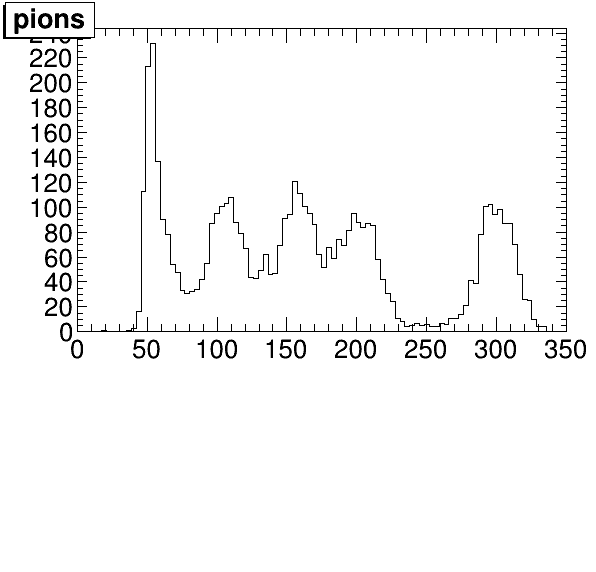

In [24]:
c=TCanvas()
hist.Draw()
c.Draw()

In [25]:
hists=[]
counter=0
for i in [100,150,200,300,50]:
    X_test
    pred=model.predict(np.array(X_test[counter:counter+1019]))
    counter+=1019
    hist=TH1F("hdense%d"%(i),"pions %d"%(i),100,0,350)
    for i in pred:
        hist.Fill(i)
    hists.append(hist)

 FCN=19.7735 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=1.19901e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.49580e+01   4.19694e+00   6.93249e-03   2.85012e-06
   2  Mean         1.07360e+02   4.86817e-01   1.08292e-03  -1.79925e-05
   3  Sigma        1.39294e+01   4.67350e-01   1.89151e-05   4.84575e-03


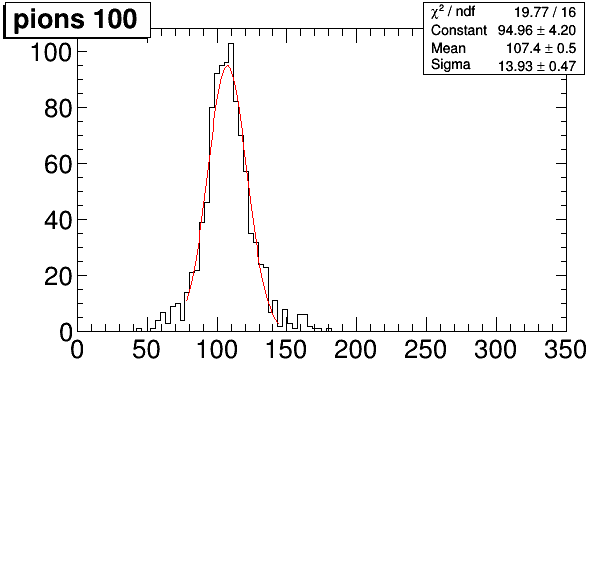

In [26]:
x1=[0,0,0,0,0]
y1=[0,0,0,0,0]
gStyle.SetOptFit()
c=TCanvas()
hists[0].Draw()
fresults=hists[0].Fit("gaus","","",78,145);
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x1[1]=(1.34669e+01/1.08064e+02)
y1[1]=(1.0/sqrt(100.0))

 FCN=58.3079 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=3.86908e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.89185e+01   3.91864e+00   1.09834e-02  -2.75026e-06
   2  Mean         1.60678e+02   5.17083e-01   1.85652e-03  -7.01977e-06
   3  Sigma        1.46412e+01   4.52300e-01   2.75305e-05  -7.45838e-04


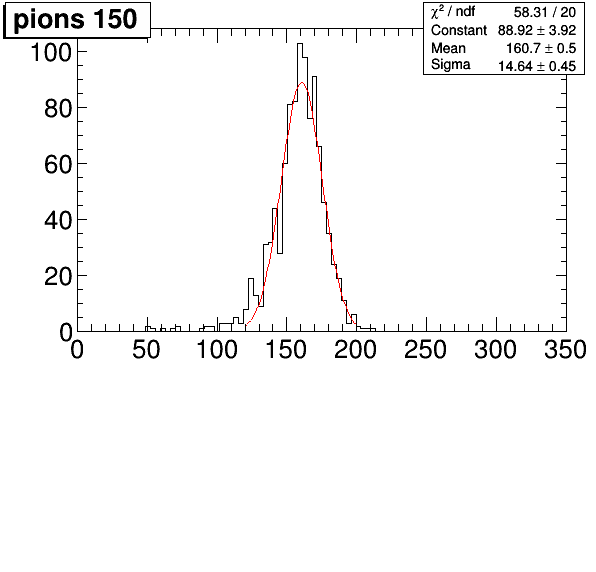

In [89]:
gStyle.SetOptFit()
c=TCanvas()
hists[1].Draw()
fresults=hists[1].Fit("gaus","","",120,200);
c.Draw()
x1[2]=(1.46412e+01/1.60678e+02)
y1[2]=(1.0/sqrt(150.0))

 FCN=14.0743 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=4.34401e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.29494e+01   3.75951e+00   5.28633e-03   2.03927e-05
   2  Mean         2.04968e+02   5.74767e-01   1.08634e-03   1.30294e-04
   3  Sigma        1.54306e+01   5.73475e-01   1.83591e-05   3.17565e-03


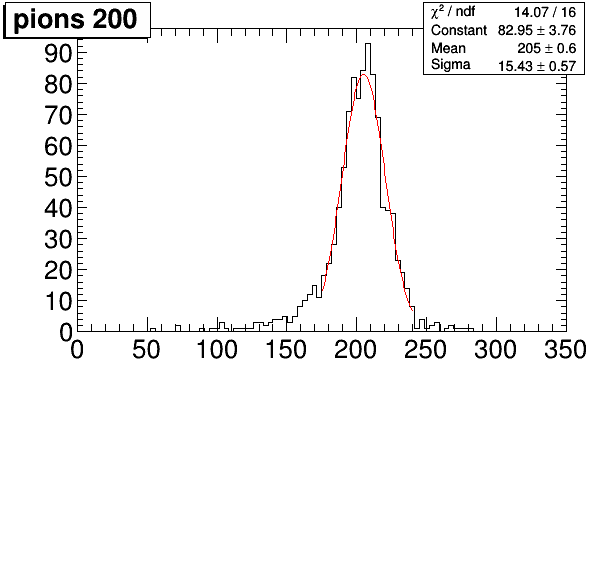

In [90]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[2].Draw()
fresults=hists[2].Fit("gaus","","",175,240);
c.Draw()
x1[3]=(1.54306e+01/2.04968e+02)
y1[3]=(1.0/sqrt(200.0))

 FCN=45.4358 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=4.44679e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.46457e+02   1.09502e+01   2.66970e-02   2.45665e-06
   2  Mean         3.15458e+02   1.76256e-01   5.79078e-04  -8.11918e-05
   3  Sigma        5.34577e+00   1.61601e-01   2.16589e-05  -1.46577e-04


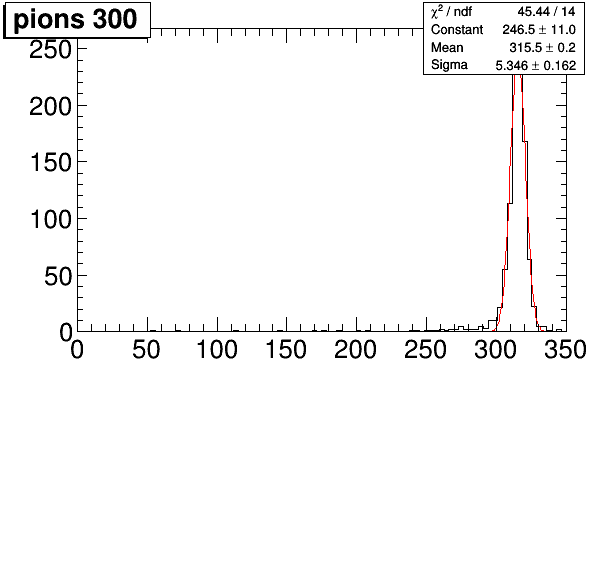

In [86]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[3].Draw()
fresults=hists[3].Fit("gaus","","",280,340);
c.Draw()
x1[4]=(1.26361e+01/3.11319e+02)
y1[4]=(1.0/sqrt(300.0))

 FCN=169.313 FROM MIGRAD    STATUS=CONVERGED     104 CALLS         105 TOTAL
                     EDM=4.3846e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.56276e+02   1.86466e+01   8.16109e-02  -1.18032e-05
   2  Mean         5.05122e+01   1.29735e-01   6.95933e-04  -1.41590e-03
   3  Sigma        3.03223e+00   1.15280e-01   3.64991e-05  -1.06755e-01


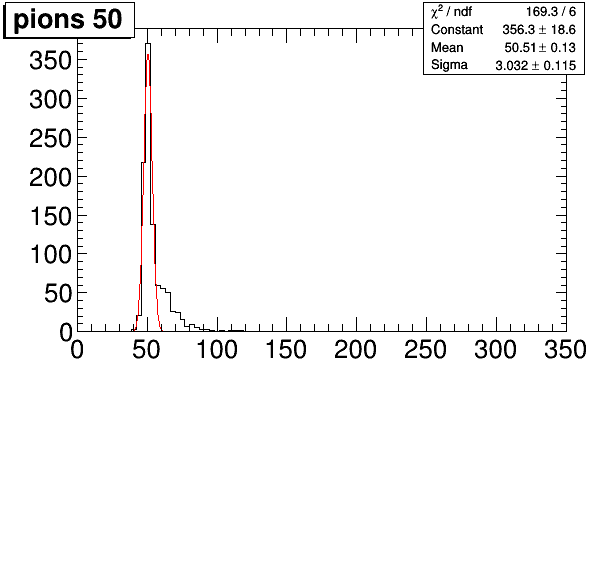

In [87]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[4].Draw()
fresults=hists[4].Fit("gaus","","",40,70);
c.Draw()
x1[0]=(3.03223e+00/5.05122e+01)
y1[0]=(1.0/sqrt(50.0))

In [58]:
gr1=TGraph(5)

In [82]:
for i in range(5):
    print("gr3.SetPoint(%d,%f,%f)"%(i,y1[i],x1[i]))
    #gr1.SetPoint (i,y1[i],x1[i])

gr3.SetPoint(0,0.141421,0.060030)
gr3.SetPoint(1,0.100000,0.124620)
gr3.SetPoint(2,0.081650,0.094963)
gr3.SetPoint(3,0.070711,0.072695)
gr3.SetPoint(4,0.057735,0.040589)


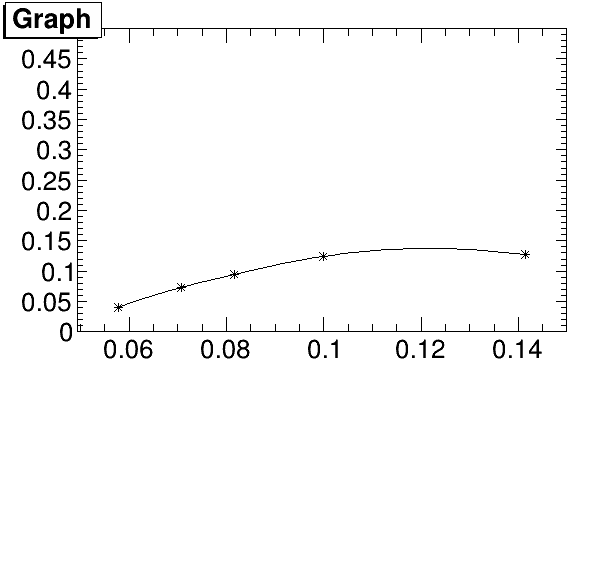

In [33]:
c=TCanvas()
gr1.GetYaxis().SetRangeUser(0.0,0.5);
#gr.GetXaxis().SetRange(18,19);
gr1.Draw("AC*")
c.Draw()

In [34]:
f = TFile( 'reg1train.root', 'recreate' )
reg = TTree("reg","pions")

In [35]:
train = array( 'f', np.array(X_train).shape[1]*[ 0.] )
target = array('i',[0])
print(np.array(X_train).shape[1])

162


In [36]:
reg.Branch( 'target', target, 'target/I' )
reg.Branch( 'var', train, 'var[162]/F' )

<ROOT.TBranch object ("var") at 0x565548bf72f0>

In [37]:
for i in range(np.array(X_train).shape[0]):
   target[0] = X_target[i]
   for j in range(162):
    train[j] = X_train[i][j]
   reg.Fill()

In [38]:
reg.Write()
f.Close()

## Creating a Keras CNN Model

In [39]:
# create model
model = Sequential()
model.add(Conv2D(16, activation='relu', kernel_size=3, padding='same', kernel_initializer='TruncatedNormal', input_shape=(9,9,2)))
model.add(Conv2D(16, activation='relu', kernel_size=3, padding='same', kernel_initializer='TruncatedNormal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, input_dim=162, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
# Compile model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 9, 9, 16)          304       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 68,673
Trainable params: 68,673
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(np.array(X_train_2ch), np.array(X_target),batch_size=25,epochs=25,verbose=1, shuffle=True)

Epoch 1/25
40000/40000 [==============================] - 6s 155us/step - loss: 1066.6615
Epoch 2/25
40000/40000 [==============================] - 6s 145us/step - loss: 650.4161
Epoch 3/25
40000/40000 [==============================] - 6s 142us/step - loss: 621.7238
Epoch 4/25
40000/40000 [==============================] - 6s 149us/step - loss: 593.7601
Epoch 5/25
40000/40000 [==============================] - 6s 138us/step - loss: 554.1304
Epoch 6/25
40000/40000 [==============================] - 6s 140us/step - loss: 502.8608
Epoch 7/25
40000/40000 [==============================] - 5s 137us/step - loss: 459.1191
Epoch 8/25
40000/40000 [==============================] - 5s 137us/step - loss: 434.7273
Epoch 9/25
40000/40000 [==============================] - 5s 137us/step - loss: 415.6833
Epoch 10/25
40000/40000 [==============================] - 6s 140us/step - loss: 407.3656
Epoch 11/25
40000/40000 [==============================] - 6s 141us/step - loss: 397.5695
Epoch 12/25
40000/

In [41]:
pred2ch=model.predict(np.array(X_test_2ch))

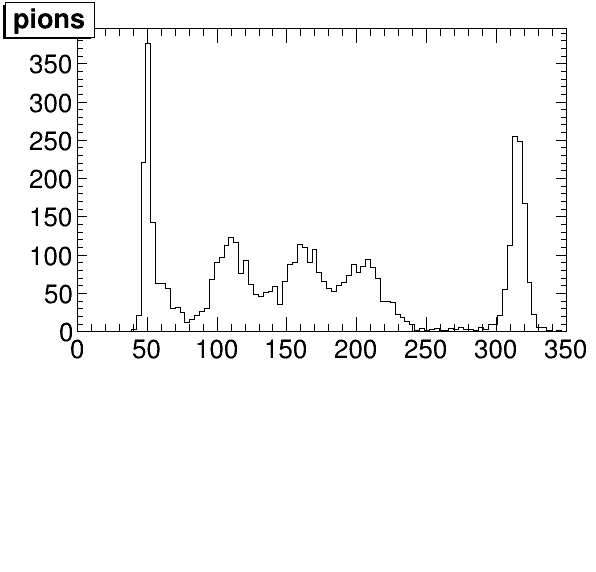

In [42]:
hist=TH1F("h1","pions",100,0,350)
for i in pred2ch:
    hist.Fill(i)
c=TCanvas()
hist.Draw()
c.Draw()

In [43]:
hists=[]
counter=0
for i in [100,150,200,300,50]:
    X_test_2ch
    pred=model.predict(np.array(X_test_2ch[counter:counter+1019]))
    counter+=1019
    hist=TH1F("h%d"%(i),"pions %d"%(i),100,0,350)
    for i in pred:
        hist.Fill(i)
    hists.append(hist)

 FCN=20.0014 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=4.43586e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.10983e+02   5.07242e+00   8.63626e-03  -2.16807e-05
   2  Mean         1.09338e+02   5.04079e-01   9.90538e-04  -9.75510e-06
   3  Sigma        1.11760e+01   4.63095e-01   2.28528e-05  -1.90658e-03


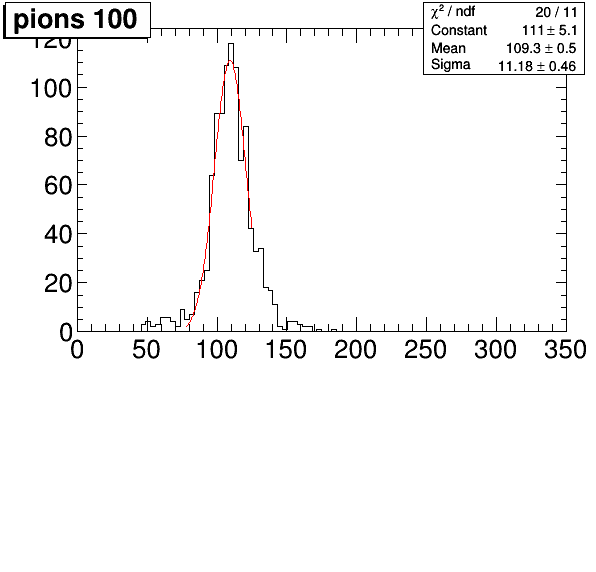

In [44]:
#vstart = [3, 1 , 0.1 , 0.01]
#step[4] = [0.1 , 0.1 , 0.01 , 0.001]
#gMinuit.mnparm(0, "Constant", [125], [0.01], 0,0,0);
#gMinuit->mnparm(1, "a2", vstart[1], step[1], 0,0,ierflg);
#gMinuit->mnparm(2, "a3", vstart[2], step[2], 0,0,ierflg);
#gMinuit->mnparm(3, "a4", vstart[3], step[3], 0,0,ierflg);

x=[0,0,0,0,0]
y=[0,0,0,0,0]
gStyle.SetOptFit()
c=TCanvas()
hists[0].Draw()
fresults=hists[0].Fit("gaus","","",78,125);
#fit.Fit("gaus","","",78,125)
#fit = hist.GetFunction("gaus")
#Mean = fit.GetParameter(1)
#Sigma = fit.GetParameter(2)
#print("Mean = %f Sigma = %f "%(Mean,Sigma))

c.Draw()
x[1]=(9.94462e+00/1.05545e+02)
y[1]=(1.0/sqrt(100.0))

 FCN=58.3079 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=3.86906e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.89185e+01   3.91864e+00   1.09834e-02  -2.75026e-06
   2  Mean         1.60678e+02   5.17083e-01   1.85652e-03  -7.01971e-06
   3  Sigma        1.46412e+01   4.52300e-01   2.75305e-05  -7.45838e-04


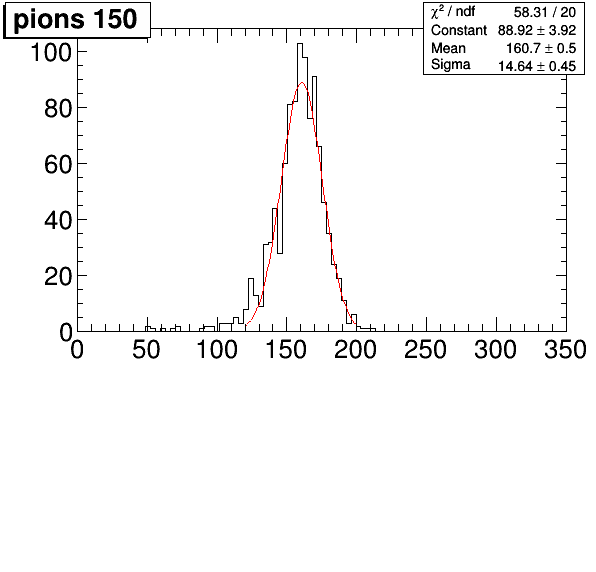

In [45]:
gStyle.SetOptFit()
c=TCanvas()
hists[1].Draw()
fresults=hists[1].Fit("gaus","","",120,200);
c.Draw()
x[2]=(1.38278e+01/1.54555e+02)
y[2]=(1.0/sqrt(150.0))

 FCN=8.57169 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=1.25677e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.65840e+01   4.19951e+00   4.77756e-03   3.36183e-05
   2  Mean         2.03913e+02   7.60121e-01   9.85110e-04  -4.44596e-05
   3  Sigma        1.39974e+01   8.03453e-01   2.24847e-05   1.00524e-02


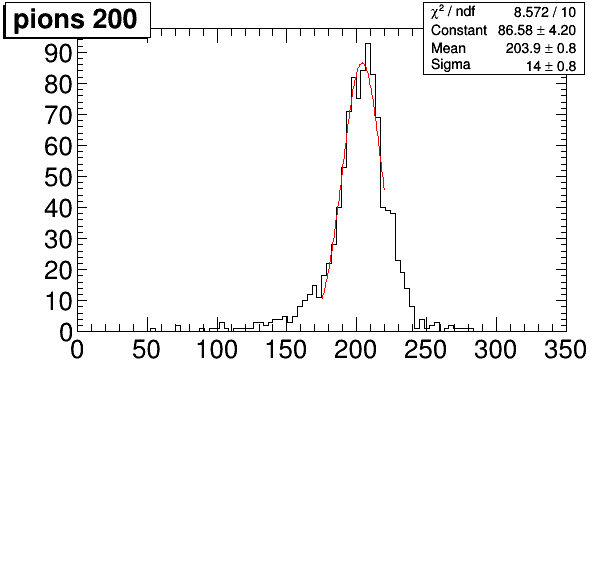

In [46]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[2].Draw()
fresults=hists[2].Fit("gaus","","",175,220);
c.Draw()
x[3]=(1.20306e+01/1.95014e+02)
y[3]=(1.0/sqrt(200.0))

 FCN=47.4356 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=2.37518e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.46456e+02   1.09503e+01   2.72650e-02   1.83252e-07
   2  Mean         3.15458e+02   1.76256e-01   5.91411e-04   3.95895e-04
   3  Sigma        5.34578e+00   1.61606e-01   2.18927e-05   1.28442e-03


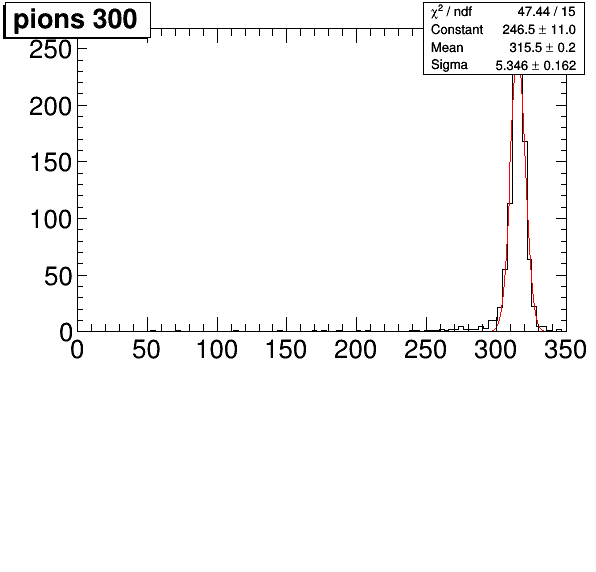

In [64]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[3].Draw()
fresults=hists[3].Fit("gaus","","",280,350);
c.Draw()
x[4]=(5.34578e+00/3.15458e+02)
y[4]=(1.0/sqrt(300.0))

 FCN=25.8592 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=2.05941e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.24735e+02   1.87746e+01   2.97878e-02  -3.29682e-06
   2  Mean         5.02069e+01   1.84311e-01   3.91348e-04   1.18021e-03
   3  Sigma        3.59553e+00   2.47442e-01   3.57539e-05   8.00207e-04


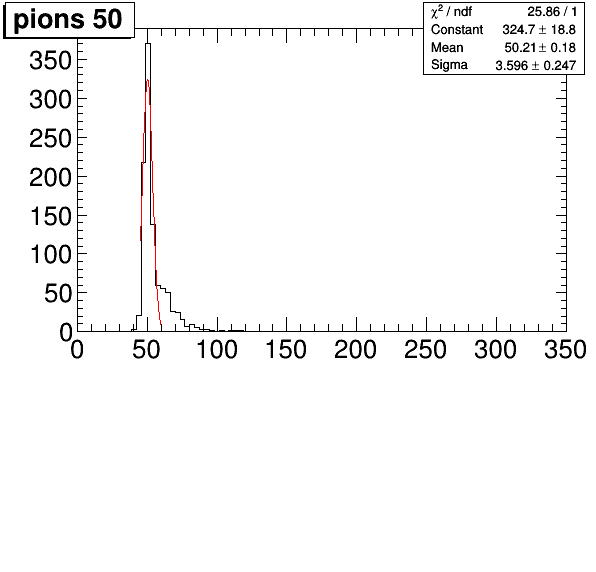

In [80]:
gStyle.SetOptFit()
setTDRStyle()
c=TCanvas()
hists[4].Draw()
fresults=hists[4].Fit("gaus","","",45,60);
c.Draw()
x[0]=(3.59553e+00/5.02069e+01)
y[0]=(1.0/sqrt(50.0))

In [67]:
gr2=TGraph(5)

In [81]:
for i in range(5):
    print("gr4.SetPoint(%d,%f,%f)"%(i,y[i],x[i]))
    gr2.SetPoint (i,y[i],x[i])

gr4.SetPoint(0,0.141421,0.071614)
gr4.SetPoint(1,0.100000,0.094222)
gr4.SetPoint(2,0.081650,0.089468)
gr4.SetPoint(3,0.070711,0.061691)
gr4.SetPoint(4,0.057735,0.016946)


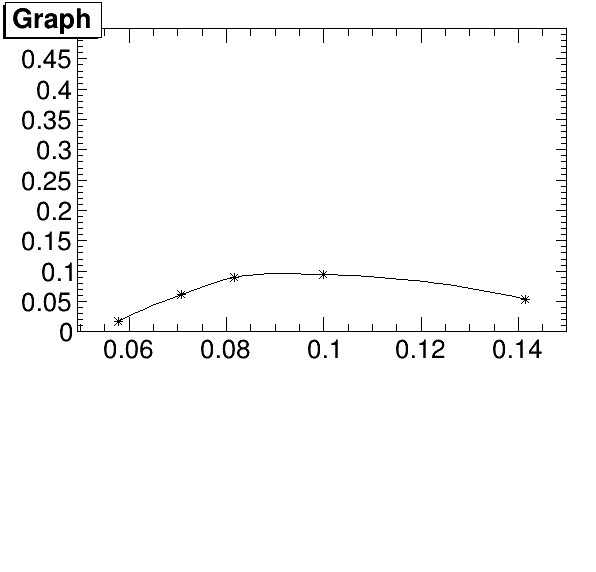

In [71]:
c=TCanvas()
gr2.GetYaxis().SetRangeUser(0.0,0.5);
#gr.GetXaxis().SetRange(18,19);
gr2.Draw("AC*")
c.Draw()

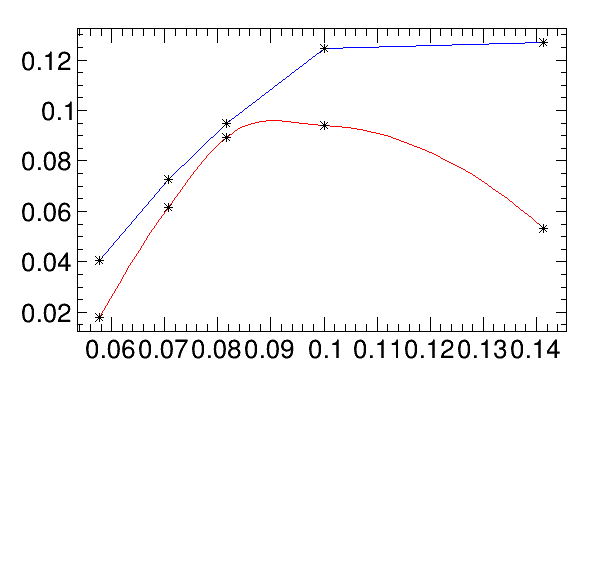

In [52]:
c=TCanvas()
gr1.SetLineColor(kBlue)
gr2.SetLineColor(kRed)
mg =TMultiGraph()
mg.Add(gr1,"lp")
mg.Add(gr2,"cp")
mg.Draw("a")
c.Draw()